### Linear Convection 2d

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline

class field_2D:
    def __init__(self, nx, len_x, ny, len_y, nt, sigma):
        
        dx = len_x/(nx-1)
        dy = len_y/(ny-1)
        dt = dx * sigma
        
        x = np.linspace(0, len_x, nx)
        y = np.linspace(0, len_y, ny)
        t = np.linspace(0, dt*(nt), nt)
        
        self.x = x
        self.y = y
        self.t = t
        self.nx = nx
        self.dx = dx
        self.ny = ny
        self.dy = dy
        self.nt = nt
        self.dt = dt
        self.grid = np.ones((nx,ny,nt))

In [2]:
field = field_2D(81,2,81,2,100,.2)

### Initial Conditions

In [3]:
field.grid[int(.5 / field.dy):int(1 / field.dy + 1),int(.5 / field.dx):int(1 / field.dx + 1),0] = 2

In [4]:
def plot(field, t):
    grid = field.grid[:,:,t]
    x = field.x
    y = field.y
    
    xs, ys = np.meshgrid(x,y)

    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    ax.plot_surface(xs, ys, grid, cmap='hot')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.show()

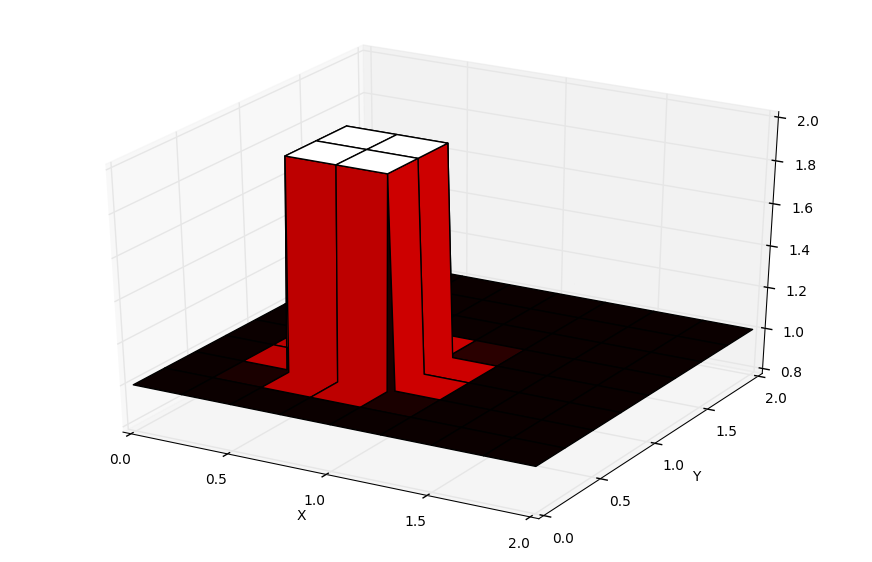

In [5]:
plot(field, 0)

### Updating in 2D

Using nested for loops

In [6]:
def update_loop(field):
    u = field.grid
    nt = field.nt
    nx = field.nx
    ny = field.ny
    dt = field.dt
    dx = field.dx
    dy = field.dy
    c = 1
    
    
    for n in range(nt - 1): ##loop across number of time steps
        for j in range(1, nx-1):
            for i in range(1, ny-1):
                u[j, i, n+1] = (u[j, i, n] - (c * dt / dx * (u[j, i, n] - u[j, i - 1, n])) - (c * dt / dy * (u[j, i, n] - u[j - 1, i, n])))
    
    


In [7]:
t1a = time.time()
update_loop(field)
t1b = time.time()

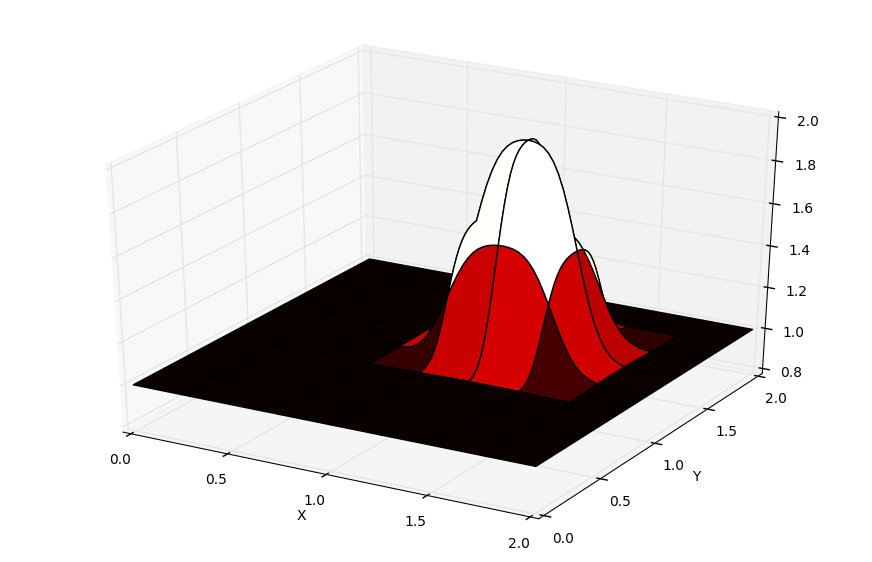

In [8]:
plot(field, 99)

### Updating in 2D

Using vector operations

In [9]:
def update_vector(field):
    u = field.grid
    nt = field.nt
    nx = field.nx
    ny = field.ny
    dt = field.dt
    dx = field.dx
    dy = field.dy
    c = 1
    
    

    u[1:, 1:, 2:] = (u[1:, 1:, 1:-1] - (c * dt / dx * (u[1:, 1:, 1:-1] - u[1:, :-1, 1:-1])) - (c * dt / dy * (u[1:, 1:, 1:-1] - u[:-1, 1:, 1:-1])))



In [10]:
t2a = time.time()
update_vector(field)
t2b = time.time()

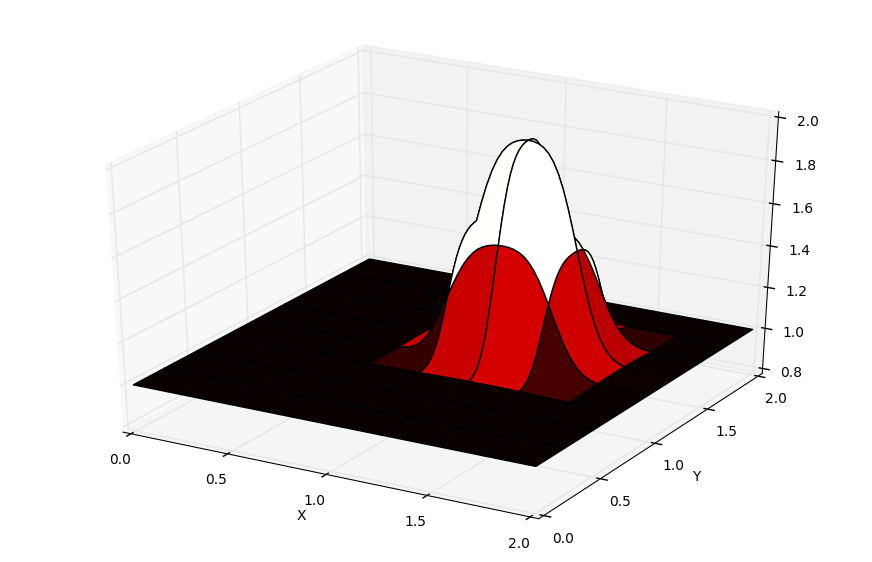

In [11]:
plot(field, 99)

In [12]:
print ("Loop Time: " + str(t1b-t1a))
print ("Vector Time: " +str(t2b-t2a))

Loop Time: 0.7878842353820801
Vector Time: 0.008867740631103516
